# **EDA BBVA**

- Karina Lizette Gamboa Puente
- Yusuri Arciga Reyes
- Oscar Arturo Bringas López
- Aide Jazmín González Cruz

## Liberías necesarias

In [59]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns 
# Para ignorar warnings
import warnings
warnings.filterwarnings('ignore')

from os.path import dirname
sys.path.append(dirname('../'))
import src.utils as utils

import gc
gc.enable()

import pickle

def save_df(df, path):
    """
    Gurada un dataframe en una ruta
    :param: dateframe, path
    :return: file save
    """
    #print(path)
    #pickle.dump(df, open(path, "wb"))
    file_p = open(path, 'wb')
    pickle.dump(df, file_p)
    file_p.close()
    
def load_df(path):
    """
    Carga datos dado una ruta
    :param: path
    :return: dataframe
    """
    # print("load")
    # print(path)
    # df_pkl = pickle.load(open(path, "rb"))
    file_p = open(path, 'rb')
    df_pkl = pickle.load(file_p)
    file_p.close()
    
    return df_pkl

#### Lectura de datos a nivel de transacciones

In [60]:
df = pd.read_csv("01dataBaseTrainTrxRec.csv")
df.head(20)

,fechaOper,codCliente,codGiro,codEstab,flagLimaProvEstab,ubigeoEstab,ctdTrx,ratingMonto
0,2017-01-29 00:00:00,7649,138.0,43629,1,176.0,1,0.014072
1,2016-12-01 00:00:00,24604,75.0,4326,0,81.0,1,0.001667
2,2017-06-01 00:00:00,15289,75.0,4326,0,81.0,1,0.000127
3,2017-09-22 00:00:00,5190,110.0,59776,1,156.0,1,0.001167
4,2017-05-05 00:00:00,16635,75.0,31043,0,81.0,1,0.047386
5,2017-08-28 00:00:00,1578,66.0,41706,1,176.0,1,0.019062
6,2017-07-19 00:00:00,18185,85.0,24590,0,22.0,1,0.001747
7,2016-12-01 00:00:00,10836,122.0,230,1,143.0,1,0.008692
8,2017-07-20 00:00:00,11467,110.0,5561,1,148.0,2,0.011116
9,2017-08-24 00:00:00,9763,75.0,826,1,171.0,1,0.032054


Donde:

| Variable| Descripción|
| ------- | ---------- |
| fechaOper | Fecha de transacción YYYY-MM-DD .HH.Min (12 meses)|
| codCliente | Código de cliente banco|
| codGiro | Código de giro de transacción (rubro de consumo), el rubro puede ser: restaurantes, tiendas, hotel, etc.|
| codEstab | Código de establecimiento o comercio, el comercio puede ser: Tienda El av. Begonias, Cineplanet av. Izaguirre, etc.|
| flagLimaProvEstab | Flag de procedencia del establecimiento o comercio donde 1: Lima/Callao y 0: Provincia|
| ubigeoEstab | Código de ubigeo (código de procedencia) del establecimiento o comercio|
| ctdTrx | Cantidad de transacción (frecuencia de consumo)|
| rankingMonto | Ranking de prioridad de consumo por cliente / establecimiento (puntaje original), [Monto comercio/Monto Total] por Cliente|

#### Lectura de datos del perfil de cliente.

In [61]:
df_c = pd.read_csv("02dataBasePerfilRec.csv")
df_c.head(20)

,codCliente,rangoEdad,rangoIngreso,flagGenero,flagLimaProvCliente,ubigeoCliente,rangoCtdProdAct,rangoCtdProdPas,rangoCtdProdSeg,flagBxi,saldoTcEntidad1,saldoTcEntidad2,saldoTcEntidad3,saldoTcEntidad4
0,24041,Rango2,Rango2,1,0,360.0,Rango1,Rango1,Rango1,1,NaN,NaN,NaN,NaN
1,9040,Rango4,Rango6,1,1,260.0,Rango1,Rango1,Rango1,1,Rango1,Rango1,Rango1,Rango1
2,18233,Rango2,Rango1,1,1,273.0,Rango1,Rango2,Rango1,1,Rango2,Rango1,Rango1,Rango1
3,7226,Rango5,Rango3,0,1,241.0,Rango1,Rango2,Rango1,1,Rango1,Rango2,Rango1,Rango2
4,21617,Rango3,Rango2,1,1,268.0,Rango1,Rango1,Rango1,0,NaN,NaN,NaN,NaN
5,9649,Rango5,Rango6,1,1,273.0,Rango2,Rango2,Rango2,1,Rango2,Rango1,Rango1,Rango1
6,24762,Rango1,Rango1,1,1,241.0,Rango1,Rango1,Rango1,1,NaN,NaN,NaN,NaN
7,2486,Rango5,Rango1,0,1,241.0,Rango1,Rango1,Rango1,1,Rango1,Rango1,Rango1,Rango1
8,26272,Rango2,Rango1,0,1,268.0,Rango1,Rango1,Rango1,1,Rango1,Rango1,Rango1,Rango1
9,13242,Rango5,Rango4,0,1,241.0,Rango1,Rango2,Rango2,1,Rango1,Rango1,Rango1,Rango1


Donde: 
    
| Variable| Descripción|
| ------- | ---------- |
| codCliente | Código de cliente banco|
| rangoEdad | Rango de edad del cliente donde: Rango1 hasta Rango6 la edad se ordena ascendentemente |
| rangoIngreso | Rango de Ingreso del cliente donde: Rango1 hasta Rango6 la edad se ordena ascendentemente |
| flagGenero | Flag de género del cliente donde 1: Masculino y 0: Femenino |
| flagLimaProvCliente | Flag de procedencia del cliente donde 1: Lima/Callao y 0: Provincia |
| ubigeoCliente | Código de ubigeo (código de procedencia) del cliente |
| rangoCtdProdAct | Rango de cantidad de productos activos (tarjeta crédito, préstamo hipotecario, préstamo vehicular y préstamo personal) donde: Rango1 hasta Rango3 la edad se ordena ascendentemente |
| rangoCtdProdPas | Rango de cantidad de productos pasivos (ahorros, fondo mutuo, cts, ahorro plazo) donde: Rango1 hasta Rango3 la edad se ordena ascendentemente |
| rangoCtdProdSeg | Rango de cantidad de productos de seguros (oncologico, protección múltiple, vida, vehicular, etc.) donde: Rango1 hasta Rango4 la edad se ordena ascendentemente |
| flagBxi | Flag si el cliente está afiliado a banca por internet donde 1: si lo esta y 0: no lo esta |
| saldoTcEntidad1 | Rango de saldo de tarjeta de crédito de la entidad 1 en el sistema financiero donde: Rango1 hasta Rango6 la edad se ordena ascendentemente |
| saldoTcEntidad2 | Rango de saldo de tarjeta de crédito de la entidad 2 en el sistema financiero donde: Rango1 hasta Rango5 la edad se ordena ascendentemente |
| saldoTcEntidad3 | Rango de saldo de tarjeta de crédito de la entidad 3 en el sistema financiero donde: Rango1 hasta Rango6 la edad se ordena ascendentemente |
| saldoTcEntidad4 | Rango de saldo de tarjeta de crédito de la entidad 4 en el sistema financiero donde: Rango1 hasta Rango6 la edad se ordena ascendentemente |


Uniendo la información de ambas tablas

In [62]:
df_completo = df.merge(df_c, on="codCliente", how="left")
df_completo

,fechaOper,codCliente,codGiro,codEstab,flagLimaProvEstab,ubigeoEstab,ctdTrx,ratingMonto,rangoEdad,rangoIngreso,...,flagLimaProvCliente,ubigeoCliente,rangoCtdProdAct,rangoCtdProdPas,rangoCtdProdSeg,flagBxi,saldoTcEntidad1,saldoTcEntidad2,saldoTcEntidad3,saldoTcEntidad4
0,2017-01-29 00:00:00,7649,138.0,43629,1,176.0,1,0.014072,Rango4,Rango2,...,1,281.0,Rango1,Rango2,Rango1,1,Rango3,Rango1,Rango1,Rango1
1,2016-12-01 00:00:00,24604,75.0,4326,0,81.0,1,0.001667,Rango2,Rango3,...,0,185.0,Rango1,Rango1,Rango2,1,Rango4,Rango3,Rango1,Rango1
2,2017-06-01 00:00:00,15289,75.0,4326,0,81.0,1,0.000127,Rango3,Rango1,...,0,185.0,Rango1,Rango1,Rango1,1,Rango6,Rango1,Rango1,Rango1
3,2017-09-22 00:00:00,5190,110.0,59776,1,156.0,1,0.001167,Rango5,Rango5,...,1,271.0,Rango2,Rango1,Rango2,1,Rango6,Rango1,Rango1,Rango1
4,2017-05-05 00:00:00,16635,75.0,31043,0,81.0,1,0.047386,Rango5,Rango6,...,0,185.0,Rango1,Rango1,Rango1,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591612,2017-09-08 00:00:00,7404,114.0,30314,1,157.0,1,0.000901,Rango5,Rango5,...,1,262.0,Rango1,Rango2,Rango1,1,Rango3,Rango1,Rango1,Rango1
1591613,2017-05-21 00:00:00,12253,110.0,29035,1,165.0,1,0.000706,Rango6,Rango1,...,1,270.0,Rango1,Rango1,Rango1,0,NaN,NaN,NaN,NaN
1591614,2017-07-31 00:00:00,16096,75.0,4323,1,171.0,1,0.005984,Rango5,Rango1,...,1,79.0,Rango1,Rango2,Rango1,1,Rango1,Rango1,Rango2,Rango1
1591615,2017-05-12 00:00:00,8852,110.0,51574,1,175.0,1,0.000613,Rango4,Rango6,...,1,268.0,Rango1,Rango2,Rango2,1,Rango1,Rango5,Rango1,Rango6


## Profiling inicial
**Obteniendo infromación general del dataset de transacciones**

- Filas y columnas

In [63]:
df.shape

(1591617, 8)

- Columnas y tipo de columnas

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591617 entries, 0 to 1591616
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   fechaOper          1591617 non-null  object 
 1   codCliente         1591617 non-null  int64  
 2   codGiro            1498931 non-null  float64
 3   codEstab           1591617 non-null  int64  
 4   flagLimaProvEstab  1591617 non-null  int64  
 5   ubigeoEstab        1498931 non-null  float64
 6   ctdTrx             1591617 non-null  int64  
 7   ratingMonto        1591617 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 97.1+ MB


- Datos únicos por variable

In [65]:
utils.unicos_val_by_col(df)

fechaOper:  365
codCliente:  30000
codGiro:  223
codEstab:  74339
flagLimaProvEstab:  2
ubigeoEstab:  422
ctdTrx:  22
ratingMonto:  723645


    - Variables numéricas

In [66]:
number_variables = df.select_dtypes(include = 'number').columns.values
(len(number_variables), number_variables)

(7,
 array(['codCliente', 'codGiro', 'codEstab', 'flagLimaProvEstab',
        'ubigeoEstab', 'ctdTrx', 'ratingMonto'], dtype=object))

    - Variables tipo obeto

In [67]:
string_variables = df.select_dtypes(include = 'object').columns.values
(len(string_variables), string_variables)

(1, array(['fechaOper'], dtype=object))

Analizando variables númericas:

In [68]:
numeric_profiling_output = {elem: utils.numeric_profiling(df, elem)\
                             for elem in number_variables}

df_numeric_profiling = pd.DataFrame(numeric_profiling_output).reset_index()
df_numeric_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_numeric_profiling

,metric,codCliente,codGiro,codEstab,flagLimaProvEstab,ubigeoEstab,ctdTrx,ratingMonto
0,max,3.000000e+04,2.250000e+02,8.227600e+04,1,4.350000e+02,2.900000e+01,1.000000e+00
1,min,1.000000e+00,2.000000e+00,1.000000e+00,0,2.000000e+00,1.000000e+00,2.984905e-06
2,mean,1.334583e+04,1.048248e+02,2.453260e+04,0.808417,1.747467e+02,1.072021e+00,1.318383e-02
3,stdv,8.493548e+03,3.920585e+01,1.990371e+04,0.393546,6.856421e+01,3.465646e-01,3.236438e-02
4,25%,6.035000e+03,7.500000e+01,4.339000e+03,1.0,1.480000e+02,1.000000e+00,1.598366e-03
5,median,1.258100e+04,1.080000e+02,2.266500e+04,1.0,1.650000e+02,1.000000e+00,4.199563e-03
6,75%,2.046200e+04,1.120000e+02,3.673100e+04,1.0,1.750000e+02,1.000000e+00,1.152572e-02
7,kurtosis,-1.127846e+00,1.396608e+00,-1.170011e-01,0.456673,4.705918e+00,2.121735e+02,1.256666e+02
8,skewness,2.118644e-01,1.287953e+00,6.609636e-01,-1.567377,1.972557e+00,9.656776e+00,8.806867e+00
9,uniques,3.000000e+04,2.220000e+02,7.433900e+04,2,4.210000e+02,2.200000e+01,7.236450e+05


Analizando variables categóricas

In [69]:
category_profiling_output = {elem: utils.categorical_profiling(df, elem)\
                             for elem in string_variables}

df_category_profiling = pd.DataFrame(category_profiling_output).reset_index()
df_category_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_category_profiling

,metric,fechaOper
0,faltantes_totales,0
1,mode,[2017-07-15 00:00:00]
2,nombres_categoria,"[2017-01-29 00:00:00, 2016-12-01 00:00:00, 201..."
3,numero_categorias,365
4,proporcion_faltantes,0.0
5,renglones_totales,1591617
6,top1,2017-07-15 00:00:00
7,top2,2017-09-30 00:00:00
8,top3,2016-12-24 00:00:00
9,valores_unicos,365


**Obteniendo infromación general del dataset de perfil de clientes**

- Filas y columnas

In [70]:
df_c.shape

(30000, 14)

- Columnas y tipo de columnas

In [71]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   codCliente           30000 non-null  int64  
 1   rangoEdad            29943 non-null  object 
 2   rangoIngreso         28737 non-null  object 
 3   flagGenero           30000 non-null  int64  
 4   flagLimaProvCliente  30000 non-null  int64  
 5   ubigeoCliente        29996 non-null  float64
 6   rangoCtdProdAct      30000 non-null  object 
 7   rangoCtdProdPas      30000 non-null  object 
 8   rangoCtdProdSeg      30000 non-null  object 
 9   flagBxi              30000 non-null  int64  
 10  saldoTcEntidad1      23574 non-null  object 
 11  saldoTcEntidad2      23574 non-null  object 
 12  saldoTcEntidad3      23574 non-null  object 
 13  saldoTcEntidad4      23574 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 3.2+ MB


- Datos únicos por variable

In [72]:
utils.unicos_val_by_col(df_c)

codCliente:  30000
rangoEdad:  7
rangoIngreso:  7
flagGenero:  2
flagLimaProvCliente:  2
ubigeoCliente:  419
rangoCtdProdAct:  3
rangoCtdProdPas:  3
rangoCtdProdSeg:  4
flagBxi:  2
saldoTcEntidad1:  7
saldoTcEntidad2:  6
saldoTcEntidad3:  7
saldoTcEntidad4:  7


    - Variables numéricas

In [73]:
number_variables_c = df_c.select_dtypes(include = 'number').columns.values
(len(number_variables_c), number_variables_c)

(5,
 array(['codCliente', 'flagGenero', 'flagLimaProvCliente', 'ubigeoCliente',
        'flagBxi'], dtype=object))

    - Variables tipo objeto

In [74]:
string_variables_c = df_c.select_dtypes(include = 'object').columns.values
(len(string_variables_c), string_variables_c)

(9,
 array(['rangoEdad', 'rangoIngreso', 'rangoCtdProdAct', 'rangoCtdProdPas',
        'rangoCtdProdSeg', 'saldoTcEntidad1', 'saldoTcEntidad2',
        'saldoTcEntidad3', 'saldoTcEntidad4'], dtype=object))

Analizando variables númericas:

In [75]:
numeric_profiling_output_c = {elem: utils.numeric_profiling(df_c, elem)\
                             for elem in number_variables_c}

df_numeric_profiling_c = pd.DataFrame(numeric_profiling_output_c).reset_index()
df_numeric_profiling_c.rename(columns={'index': 'metric'}, inplace=True)
df_numeric_profiling_c

,metric,codCliente,flagGenero,flagLimaProvCliente,ubigeoCliente,flagBxi
0,max,30000.000000,1,1,419.000000,1
1,min,1.000000,0,0,2.000000,0
2,mean,15000.500000,0.5486,0.784033,236.747933,0.8195
3,stdv,8660.398374,0.497641,0.411498,78.342392,0.38461
4,25%,7500.750000,0.0,1.0,241.000000,1.0
5,median,15000.500000,1.0,1.0,258.000000,1.0
6,75%,22500.250000,1.0,1.0,275.000000,1.0
7,kurtosis,-1.200000,-1.961975,-0.094016,1.221058,0.760749
8,skewness,0.000000,-0.195335,-1.380576,-1.186155,-1.661535
9,uniques,30000.000000,2,2,418.000000,2


Analizando variables categóricas

In [76]:
category_profiling_output_c = {elem: utils.categorical_profiling(df_c, elem)\
                             for elem in string_variables_c}

df_category_profiling_c = pd.DataFrame(category_profiling_output_c).reset_index()
df_category_profiling_c.rename(columns={'index': 'metric'}, inplace=True)
df_category_profiling_c

,metric,rangoEdad,rangoIngreso,rangoCtdProdAct,rangoCtdProdPas,rangoCtdProdSeg,saldoTcEntidad1,saldoTcEntidad2,saldoTcEntidad3,saldoTcEntidad4
0,mode,[Rango5],[Rango1],[Rango1],[Rango1],[Rango1],[Rango1],[Rango1],[Rango1],[Rango1]
1,numero_categorias,6,6,3,3,4,6,5,6,6
2,nombres_categoria,"[Rango2, Rango4, Rango5, Rango3, Rango1, Rango...","[Rango2, Rango6, Rango1, Rango3, Rango4, Rango...","[Rango1, Rango2, Rango3]","[Rango1, Rango2, Rango3]","[Rango1, Rango2, Rango3, Rango4]","[nan, Rango1, Rango2, Rango3, Rango5, Rango4, ...","[nan, Rango1, Rango2, Rango3, Rango4, Rango5]","[nan, Rango1, Rango4, Rango3, Rango6, Rango5, ...","[nan, Rango1, Rango2, Rango4, Rango5, Rango6, ..."
3,valores_unicos,6,6,3,3,4,6,5,6,6
4,renglones_totales,30000,30000,30000,30000,30000,30000,30000,30000,30000
5,faltantes_totales,57,1263,0,0,0,6426,6426,6426,6426
6,proporcion_faltantes,0.19,4.21,0.0,0.0,0.0,21.42,21.42,21.42,21.42
7,top1,Rango5,Rango1,Rango1,Rango1,Rango1,Rango1,Rango1,Rango1,Rango1
8,top2,Rango6,Rango3,Rango2,Rango2,Rango2,Rango3,Rango2,Rango6,Rango2
9,top3,Rango2,Rango2,Rango3,Rango3,Rango3,Rango2,Rango3,Rango2,Rango3


# **GEDA BBVA**

**Dataset de transacciones**

Número de transacciones por cliente

In [77]:
prop_cliente = df.groupby(['codCliente'], as_index=False)['ctdTrx']\
.sum()\
.rename(columns={'ctdTrx': 'sum'})
prop_cliente['prop'] = prop_cliente['sum']/np.sum(prop_cliente['sum'])
prop_cliente.rename({'sum': 'transacciones'}, axis=1, inplace=True)
prop_cliente.sort_values(by = ['prop'], ascending = False)

,codCliente,transacciones,prop
21425,21426,1013,5.937007e-04
18819,18820,960,5.626384e-04
7093,7094,815,4.776565e-04
19963,19964,764,4.477664e-04
8515,8516,759,4.448359e-04
...,...,...,...
28961,28962,2,1.172163e-06
27676,27677,2,1.172163e-06
10702,10703,2,1.172163e-06
27336,27337,1,5.860816e-07


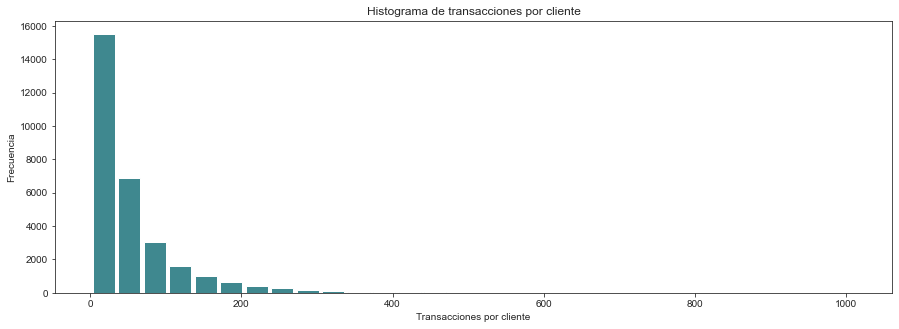

In [78]:
datos = pd.Series(prop_cliente['transacciones'])
intervalos = range(min(datos), max(datos) + 2)
plt.figure(figsize=(15,5))
datos.plot.hist(bins=30, color='#3F888F', rwidth=0.85)
plt.ylabel('Frecuencia')
plt.xlabel('Transacciones por cliente')
plt.title('Histograma de transacciones por cliente')
plt.show()

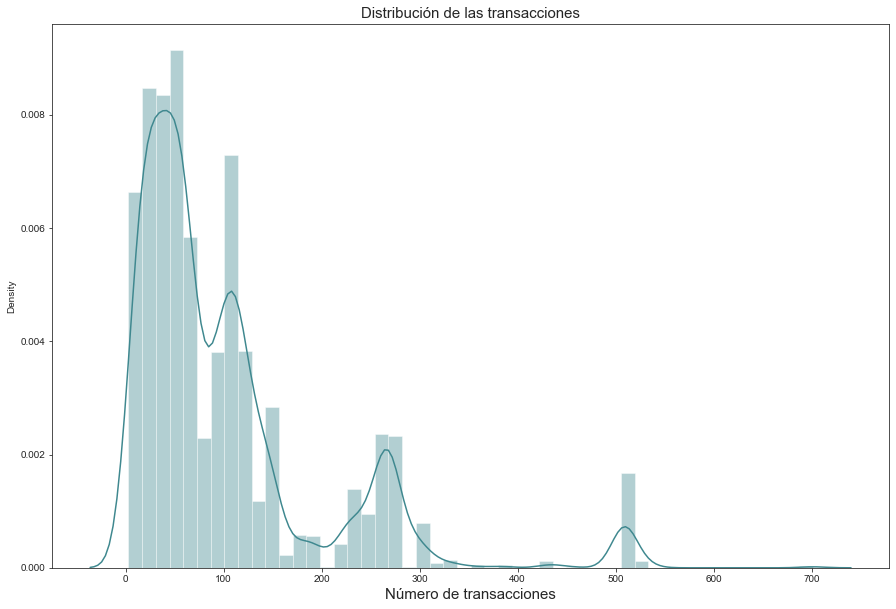

In [79]:
df_total_dom=prop_cliente.query("transacciones")

f, axes = plt.subplots(figsize=(15, 10), gridspec_kw={'hspace': 1, 'wspace': 0.5})
sns.distplot(df_total_dom.transacciones , color="#3F888F")
plt.title("Distribución de las transacciones", fontsize = 15)
plt.xlabel("Número de transacciones", fontsize = 15)
plt.show()

Comercios con mayor transacciones

In [80]:
prop_estab = df.groupby(['codEstab'], as_index=False)['ctdTrx']\
.sum()\
.rename(columns={'ctdTrx': 'sum'})
prop_estab['prop'] = prop_estab['sum']/np.sum(prop_estab['sum'])
prop_estab.rename({'sum': 'transacciones'}, axis=1, inplace=True)
prop_estab.sort_values(by = ['prop'], ascending = False)

,codEstab,transacciones,prop
22347,24539,13604,7.973054e-03
2060,2155,12972,7.602651e-03
39519,43009,12610,7.390489e-03
22352,24544,12094,7.088071e-03
39235,42697,7427,4.352828e-03
...,...,...,...
57687,63124,1,5.860816e-07
26668,29219,1,5.860816e-07
57685,63121,1,5.860816e-07
26669,29220,1,5.860816e-07


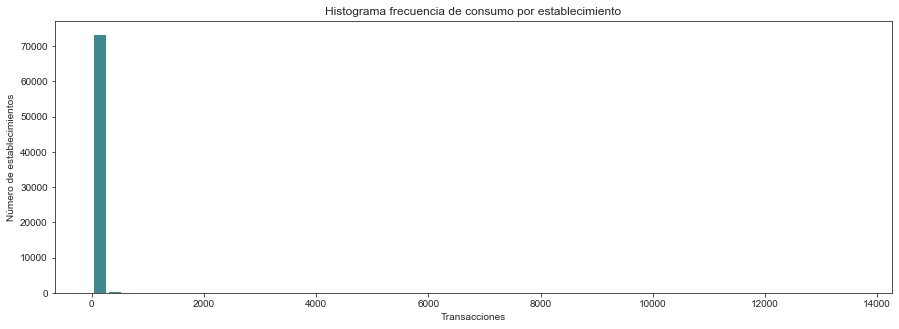

In [81]:
datos = pd.Series(prop_estab['transacciones'])
intervalos = range(min(datos), max(datos) + 2)
plt.figure(figsize=(15,5))
datos.plot.hist(bins=50, color='#3F888F', rwidth=0.85)
plt.ylabel('Número de establecimientos')
plt.xlabel('Transacciones')
plt.title('Histograma frecuencia de consumo por establecimiento')
plt.show()

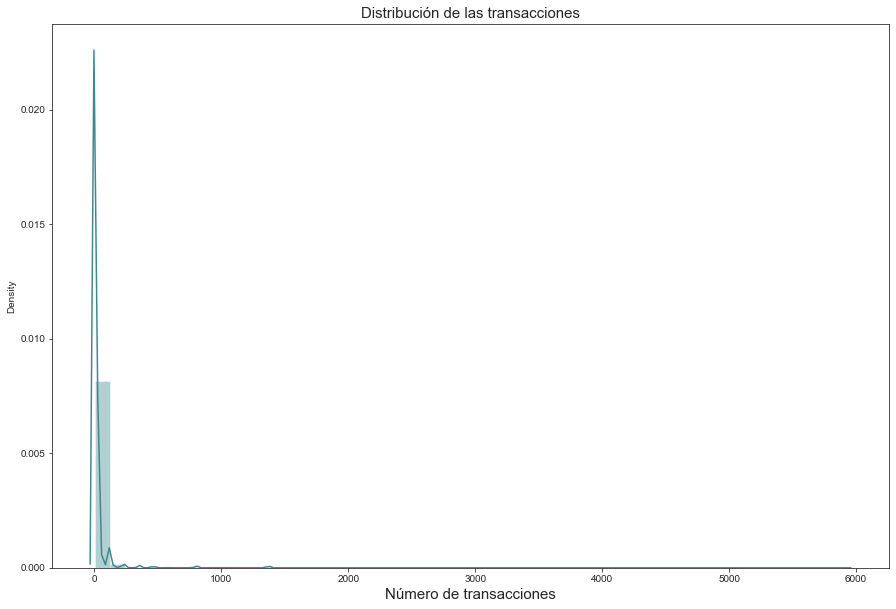

In [82]:
df_total_dom=prop_estab.query("transacciones")
f, axes = plt.subplots(figsize=(15, 10), gridspec_kw={'hspace': 1, 'wspace': 0.5})
sns.distplot(df_total_dom.transacciones , color="#3F888F")
plt.title("Distribución de las transacciones", fontsize = 15)
plt.xlabel("Número de transacciones", fontsize = 15)
sns.set_style("ticks")
plt.show()

Procedencia del comercio

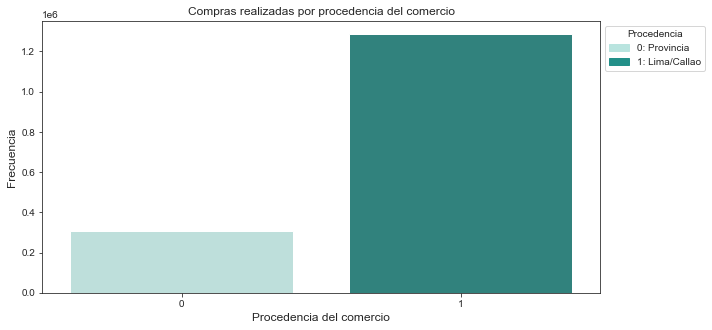

In [83]:
city_count  = df['flagLimaProvEstab'].value_counts()
plt.figure(figsize=(10,5))

palette0 = ["#B9E4DF", "#239089"]
color1 = mpatches.Patch(color='#B9E4DF', label='0: Provincia')
color2 = mpatches.Patch(color='#239089', label='1: Lima/Callao')

sns.barplot(city_count.index, city_count.values, ci=None, palette=palette0)
plt.title('Compras realizadas por procedencia del comercio')
plt.ylabel('Frecuencia', fontsize=12)
plt.xlabel('Procedencia del comercio', fontsize=12)
plt.legend(handles=[color1, color2], bbox_to_anchor=(1, 1), loc=2, fontsize = 10,
           title = "Procedencia")
plt.show()

Transacciones por giro del establecimiento

In [84]:
prop_giro = df.groupby(['codGiro'], as_index=False)['ctdTrx']\
.sum()\
.rename(columns={'ctdTrx': 'sum'})
prop_giro['prop'] = prop_giro['sum']/np.sum(prop_giro['sum'])
prop_giro.rename({'sum': 'transacciones'}, axis=1, inplace=True)
prop_giro.sort_values(by = ['prop'], ascending = False)

,codGiro,transacciones,prop
71,75.0,345939,2.151567e-01
106,110.0,243278,1.513067e-01
108,112.0,148010,9.205478e-02
81,85.0,125412,7.799996e-02
110,114.0,109096,6.785223e-02
...,...,...,...
3,5.0,1,6.219497e-07
204,208.0,1,6.219497e-07
157,161.0,1,6.219497e-07
10,13.0,1,6.219497e-07


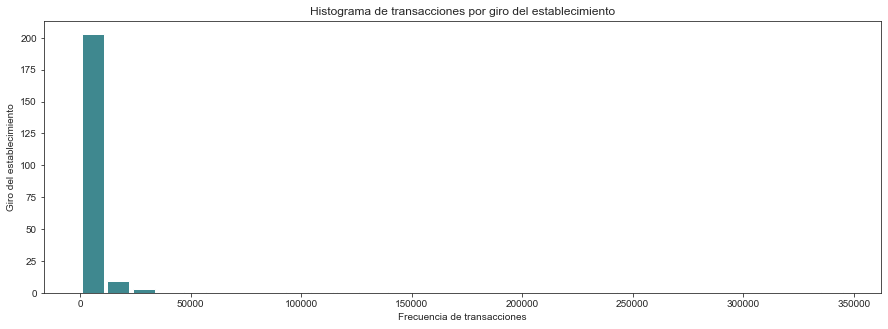

In [85]:
datos = pd.Series(prop_giro['transacciones'])
intervalos = range(min(datos), max(datos) + 2)
plt.figure(figsize=(15,5))
sns.set_style("ticks")
datos.plot.hist(bins=30, color='#3F888F', rwidth=0.85)
plt.ylabel('Giro del establecimiento')
plt.xlabel('Frecuencia de transacciones')
plt.title('Histograma de transacciones por giro del establecimiento')
plt.show()

**Dataset de perfil de clientes**

Conociendo a los clientes por rango de edad, rango de ingreso y sexo

In [86]:
clientes_data = df_c.groupby(['rangoEdad','rangoIngreso','flagGenero'], as_index=False)['codCliente']\
.count()\
.rename(columns={'codCliente': 'count'})
clientes_data['prop'] = clientes_data['count']/np.sum(clientes_data['count'])
clientes_data.sort_values(by = ['prop'], ascending = False)

,rangoEdad,rangoIngreso,flagGenero,count,prop
13,Rango2,Rango1,1,1303,0.045431
12,Rango2,Rango1,0,1297,0.045222
0,Rango1,Rango1,0,980,0.034169
25,Rango3,Rango1,1,924,0.032216
1,Rango1,Rango1,1,898,0.031310
...,...,...,...,...,...
9,Rango1,Rango5,1,8,0.000279
7,Rango1,Rango4,1,8,0.000279
11,Rango1,Rango6,1,4,0.000139
10,Rango1,Rango6,0,3,0.000105


In [87]:
df_c_0=df_c['flagGenero']==0
filtered_df_0 = df_c[df_c_0]
#print(filtered_df_0)

df_c_1=df_c['flagGenero']==1
filtered_df_1 = df_c[df_c_1]
#print(filtered_df_1)

In [88]:
clientes_data_0 = filtered_df_0.groupby(['rangoEdad','rangoIngreso','flagGenero'], as_index=False)['codCliente']\
.count()\
.rename(columns={'codCliente': 'count'})
clientes_data_0['prop'] = clientes_data_0['count']/np.sum(clientes_data_0['count'])
clientes_data_0.rename({'count': 'num_clientes'}, axis=1, inplace=True)
clientes_data_0.sort_values(by = ['prop'], ascending = False)[:5]

,rangoEdad,rangoIngreso,flagGenero,num_clientes,prop
6,Rango2,Rango1,0,1297,0.101012
0,Rango1,Rango1,0,980,0.076324
12,Rango3,Rango1,0,877,0.068302
24,Rango5,Rango1,0,854,0.066511
30,Rango6,Rango1,0,801,0.062383


In [89]:
clientes_data_1 = filtered_df_1.groupby(['rangoEdad','rangoIngreso','flagGenero'], as_index=False)['codCliente']\
.count()\
.rename(columns={'codCliente': 'count'})
clientes_data_1['prop'] = clientes_data_1['count']/np.sum(clientes_data_1['count'])
clientes_data_1.rename({'count': 'num_clientes'}, axis=1, inplace=True)
clientes_data_1.sort_values(by = ['prop'], ascending = False)[:5]

,rangoEdad,rangoIngreso,flagGenero,num_clientes,prop
6,Rango2,Rango1,1,1303,0.082255
12,Rango3,Rango1,1,924,0.058330
0,Rango1,Rango1,1,898,0.056688
35,Rango6,Rango6,1,876,0.055300
24,Rango5,Rango1,1,872,0.055047


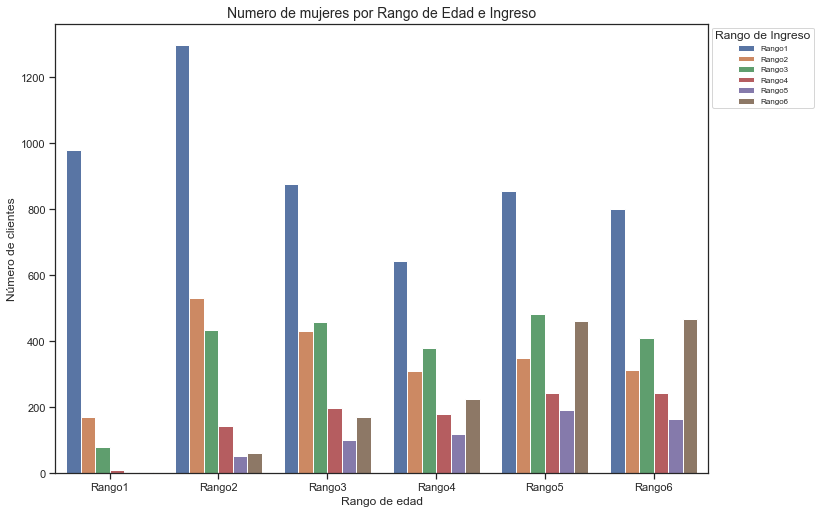

In [90]:
sns.set(rc={'figure.figsize':(11.7,8.27)})#sns.set_style("darkgrid")
sns.set_style("ticks")
sns.barplot(x = "rangoEdad", y = "num_clientes", hue = "rangoIngreso", data = clientes_data_0)
plt.title("Numero de mujeres por Rango de Edad e Ingreso", fontsize = 14)
plt.xlabel("Rango de edad")
plt.ylabel("Número de clientes")
plt.legend(bbox_to_anchor=(1, 1), loc=2, fontsize = 8,title = "Rango de Ingreso")

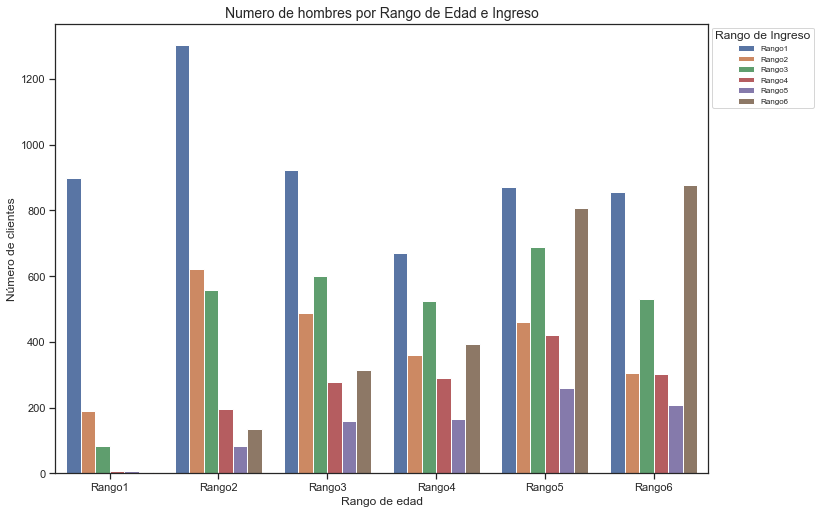

In [91]:
#sns.set_style("darkgrid")
sns.set_style("ticks")
sns.barplot(x = "rangoEdad", y = "num_clientes", hue = "rangoIngreso", data = clientes_data_1)
plt.title("Numero de hombres por Rango de Edad e Ingreso", fontsize = 14)
plt.xlabel("Rango de edad")
plt.ylabel("Número de clientes")
plt.legend(bbox_to_anchor=(1, 1), loc=2, fontsize = 8,title = "Rango de Ingreso")

Analizando rango de productos

In [92]:
productos = df_c\
.groupby(['rangoCtdProdAct','rangoCtdProdPas','rangoCtdProdSeg'], as_index=False)['codCliente']\
.count()\
.rename(columns={'codCliente': 'count'})
productos['prop'] = productos['count']/np.sum(productos['count'])
productos.rename({'count': 'num_clientes'}, axis=1, inplace=True)
productos.sort_values(by = ['prop'], ascending = False)[:5]

,rangoCtdProdAct,rangoCtdProdPas,rangoCtdProdSeg,num_clientes,prop
0,Rango1,Rango1,Rango1,16183,0.539433
4,Rango1,Rango2,Rango1,5281,0.176033
1,Rango1,Rango1,Rango2,3503,0.116767
5,Rango1,Rango2,Rango2,1830,0.061000
12,Rango2,Rango1,Rango1,661,0.022033


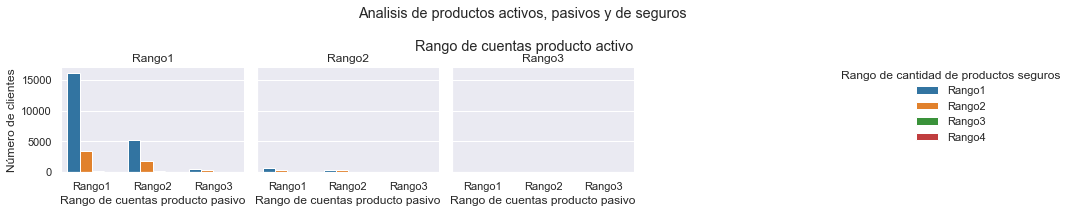

In [93]:
#sns.set_style("darkgrid")
sns.set_style("ticks")
sns.set(rc={'figure.figsize':(11,10)})
a = sns.FacetGrid(data=productos, col="rangoCtdProdAct", col_wrap=4, sharex=True, sharey=True)
a.map_dataframe(sns.barplot, x="rangoCtdProdPas", y="num_clientes", palette="tab10", hue="rangoCtdProdSeg")\
.add_legend(title='Rango de cantidad de productos seguros')
plt.subplots_adjust(top=0.7)
a.fig.suptitle("Analisis de productos activos, pasivos y de seguros\n\n Rango de cuentas producto activo")
a.set_titles("{col_name}")  # use this argument literally
a.set_axis_labels(x_var="Rango de cuentas producto pasivo", y_var="Número de clientes")


Rango de saldo por entidad

In [94]:
saldos = df_c\
.groupby(['saldoTcEntidad1','saldoTcEntidad2','saldoTcEntidad3','saldoTcEntidad4'], as_index=False)['codCliente']\
.count()\
.rename(columns={'codCliente': 'count'})
saldos['prop'] = saldos['count']/np.sum(saldos['count'])
saldos.sort_values(by = ['prop'], ascending = False)

,saldoTcEntidad1,saldoTcEntidad2,saldoTcEntidad3,saldoTcEntidad4,count,prop
0,Rango1,Rango1,Rango1,Rango1,9616,0.407907
249,Rango3,Rango1,Rango1,Rango1,1107,0.046959
36,Rango1,Rango2,Rango1,Rango1,1077,0.045686
156,Rango2,Rango1,Rango1,Rango1,967,0.041020
343,Rango4,Rango1,Rango1,Rango1,828,0.035123
...,...,...,...,...,...,...
428,Rango4,Rango4,Rango4,Rango4,1,0.000042
429,Rango4,Rango4,Rango5,Rango1,1,0.000042
430,Rango4,Rango4,Rango5,Rango6,1,0.000042
432,Rango4,Rango4,Rango6,Rango4,1,0.000042


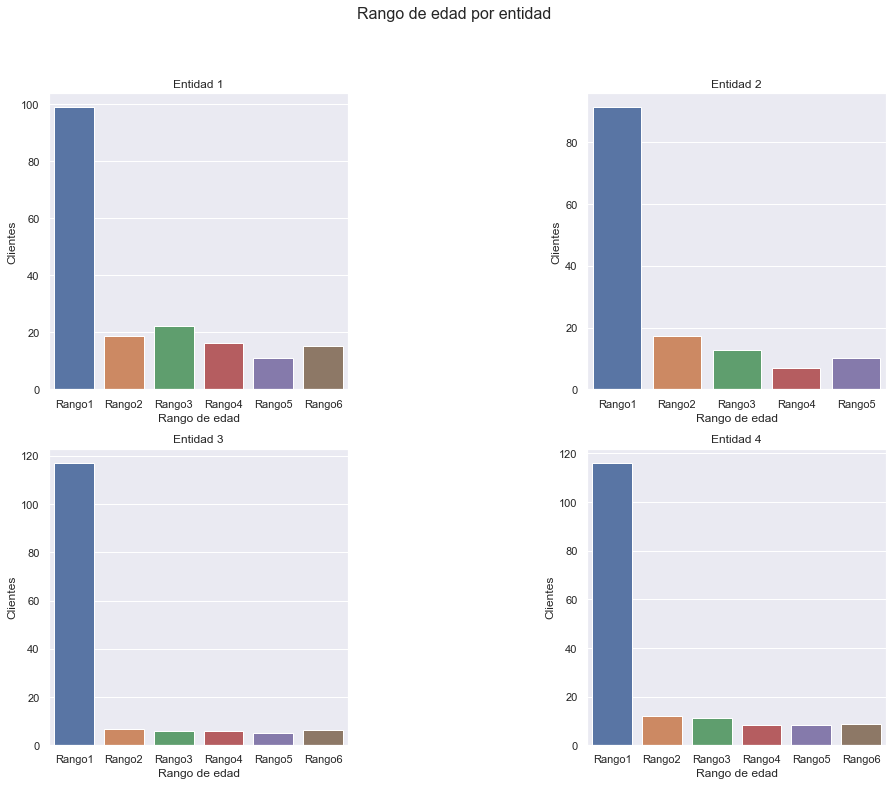

In [95]:
f, axes = plt.subplots(2, 2, figsize=(15, 12), gridspec_kw={'wspace': 0.8})
f.suptitle('Rango de edad por entidad', fontsize=16)
sns.set_style("ticks")
axes[0][0].set_title("Entidad 1")
axes[0][1].set_title("Entidad 2")
axes[1][0].set_title("Entidad 3")
axes[1][1].set_title("Entidad 4")
sns.barplot(x="saldoTcEntidad1", y="count", data=saldos, ax=axes[0][0], ci=None)
sns.barplot(x="saldoTcEntidad2", y="count", data=saldos, ax=axes[0][1], ci=None)
sns.barplot(x="saldoTcEntidad3", y="count", data=saldos, ax=axes[1][0], ci=None)
sns.barplot(x="saldoTcEntidad4", y="count", data=saldos, ax=axes[1][1], ci=None)
axes[0][0].set(xlabel='Rango de edad', ylabel='Clientes')
axes[0][1].set(xlabel='Rango de edad', ylabel='Clientes')
axes[1][0].set(xlabel='Rango de edad', ylabel='Clientes')
axes[1][1].set(xlabel='Rango de edad', ylabel='Clientes')
lines, labels = f.axes[-1].get_legend_handles_labels()
#f.legend(lines, labels, loc = 1, title='Saldos')
plt.show()


In [58]:
flags = df_c\
.groupby(['flagLimaProvCliente','flagBxi'], as_index=False)['codCliente']\
.count()\
.rename(columns={'codCliente': 'count'})
flags['prop'] = flags['count']/np.sum(flags['count'])
flags.sort_values(by = ['prop'], ascending = False)

 #	Flag de procedencia del cliente donde 1: Lima/Callao y 0: Provincia
 #	Flag si el cliente está afiliado a banca por internet donde 1: si lo esta y 0: no lo esta

,flagLimaProvCliente,flagBxi,count,prop
3,1,1,19444,0.648133
1,0,1,5141,0.171367
2,1,0,4077,0.135900
0,0,0,1338,0.044600


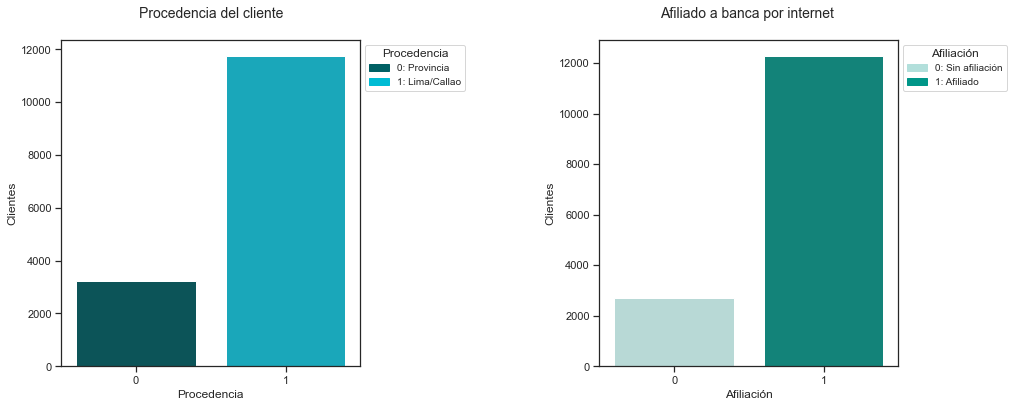

In [63]:
import matplotlib.patches as mpatches

f, axes = plt.subplots(1, 2, figsize=(15,6), gridspec_kw={'wspace': 0.8})
sns.set_style("ticks")
palette1 = ["#006064", "#00BCD4"]
color1 = mpatches.Patch(color='#006064', label='0: Provincia')
color2 = mpatches.Patch(color='#00BCD4', label='1: Lima/Callao')
plt.legend(handles=[color1, color2])

sns.barplot(x="flagLimaProvCliente", y="count", data=flags, ax=axes[0], ci=None, palette=palette1)
axes[0].set_title("Procedencia del cliente\n", fontsize = 14)
axes[0].set(xlabel='Procedencia', ylabel='Clientes')
axes[0].legend(handles=[color1, color2], bbox_to_anchor=(1, 1), loc=2, fontsize = 10,
           title = "Procedencia")

palette2 = ["#B2DFDB","#009688"]
color3 = mpatches.Patch(color='#B2DFDB', label='0: Sin afiliación')
color4 = mpatches.Patch(color='#009688', label='1: Afiliado')
plt.legend(handles=[color3, color4])

sns.barplot(x="flagBxi", y="count", data=flags, ax=axes[1], ci=None, palette=palette2)
axes[1].set_title("Afiliado a banca por internet \n", fontsize = 14)
axes[1].set(xlabel='Afiliación', ylabel='Clientes')
axes[1].legend(handles=[color3, color4], bbox_to_anchor=(1, 1), loc=2, fontsize = 10,
           title = "Afiliación")
#lines, labels = f.axes[-1].get_legend_handles_labels()
#f.legend(lines, labels, loc = 1, title='Saldos')
plt.show()


**Dataset conjunto de transacciones con clientes**

Banca en línea por Rango de Edad

In [64]:
prop_edad_trans = df_completo.groupby(['rangoEdad', 'flagBxi'], as_index=False)['ctdTrx']\
.sum()\
.rename(columns={'ctdTrx': 'sum'}).sort_values(by='sum', ascending = False)
prop_edad_trans['prop'] = prop_edad_trans['sum']/np.sum(prop_edad_trans['sum'])
prop_edad_trans.rename({'sum': 'transacciones'}, axis=1, inplace=True)
prop_edad_trans

,rangoEdad,flagBxi,transacciones,prop
9,Rango5,1,319556,0.187530
3,Rango2,1,278419,0.163389
5,Rango3,1,270883,0.158966
11,Rango6,1,252806,0.148358
7,Rango4,1,235380,0.138132
1,Rango1,1,130227,0.076423
10,Rango6,0,87961,0.051620
8,Rango5,0,59990,0.035205
6,Rango4,0,24176,0.014188
4,Rango3,0,20975,0.012309


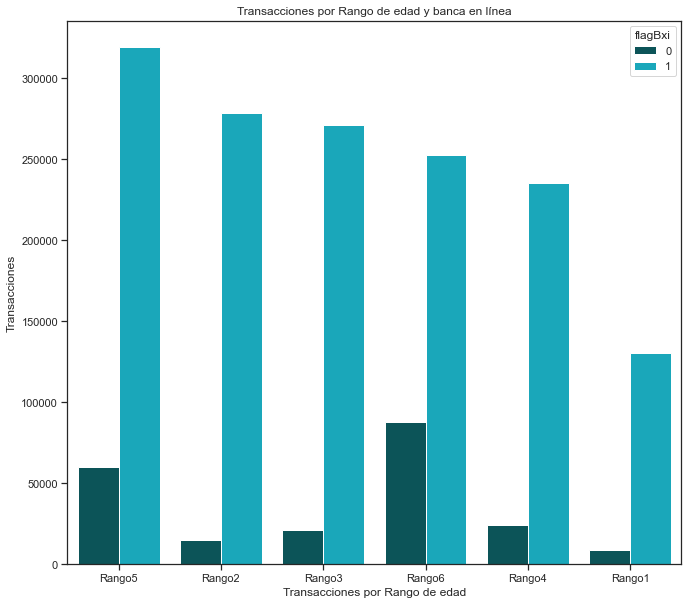

In [66]:
datos = sns.barplot(x='rangoEdad', y='transacciones', hue='flagBxi', data=prop_edad_trans, palette=palette1)
plt.ylabel('Transacciones')
plt.xlabel('Transacciones por Rango de edad')
plt.title('Transacciones por Rango de edad y banca en línea')
plt.show()


Transacciones por género y banca en línea

In [67]:
prop_gen_trans = df_completo.groupby(['flagGenero', 'flagBxi'], as_index=False)['ctdTrx']\
.sum()\
.rename(columns={'ctdTrx': 'sum'})
prop_gen_trans['prop'] = prop_gen_trans['sum']/np.sum(prop_gen_trans['sum'])
prop_gen_trans.rename({'sum': 'transacciones'}, axis=1, inplace=True)
prop_gen_trans.sort_values(by = ['prop'], ascending = False)
prop_gen_trans

,flagGenero,flagBxi,transacciones,prop
0,0,0,106746,0.062562
1,0,1,642309,0.376445
2,1,0,111675,0.065451
3,1,1,845517,0.495542


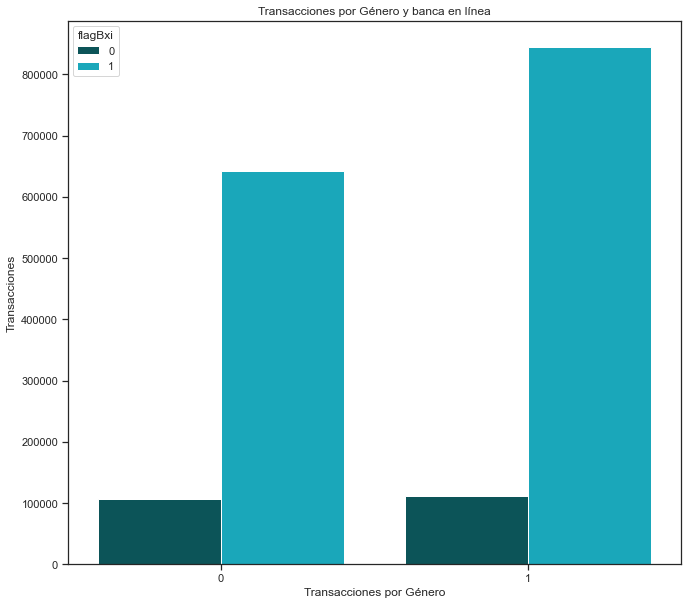

In [68]:
datos = sns.barplot(x='flagGenero', y='transacciones', hue='flagBxi', data=prop_gen_trans, palette=palette1)
plt.ylabel('Transacciones')
plt.xlabel('Transacciones por Género')
plt.title('Transacciones por Género y banca en línea')
plt.show()

Transacciones dependiendo del ingreso y género de la persona

In [69]:
prop_gen_ingr = df_completo.groupby(['rangoIngreso', 'flagGenero'], as_index=False)['ctdTrx']\
.sum()\
.rename(columns={'ctdTrx': 'sum'}).sort_values(by = ['sum'], ascending = False)
prop_gen_ingr['prop'] = prop_gen_ingr['sum']/np.sum(prop_gen_ingr['sum'])
prop_gen_ingr.rename({'sum': 'transacciones'}, axis=1, inplace=True)
prop_gen_ingr.sort_values(by = ['prop'], ascending = False)


,rangoIngreso,flagGenero,transacciones,prop
11,Rango6,1,274187,0.166776
1,Rango1,1,214167,0.130268
0,Rango1,0,199039,0.121066
5,Rango3,1,164452,0.100029
10,Rango6,0,144789,0.088069
4,Rango3,0,143178,0.087089
3,Rango2,1,105052,0.063898
7,Rango4,1,97290,0.059177
2,Rango2,0,95293,0.057962
6,Rango4,0,77573,0.047184


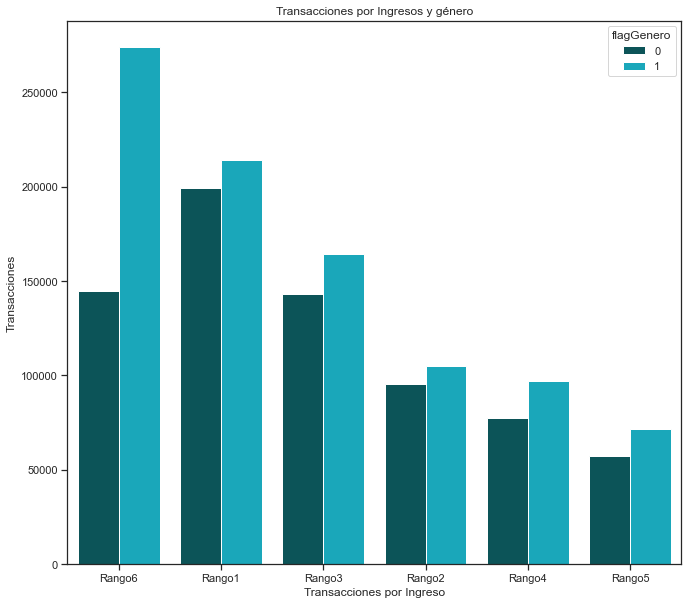

In [70]:
datos = sns.barplot(x='rangoIngreso', y='transacciones',hue='flagGenero', data=prop_gen_ingr, palette=palette1)
plt.ylabel('Transacciones')
plt.xlabel('Transacciones por Ingreso')
plt.title('Transacciones por Ingresos y género')
plt.show()

Histograma de transacciones con banca en línea

In [71]:
prop_cliente_lin = df_completo.groupby(['codCliente', 'flagBxi'], as_index=False)['ctdTrx']\
.sum()\
.rename(columns={'ctdTrx': 'sum'})
prop_cliente_lin['prop'] = prop_cliente_lin['sum']/np.sum(prop_cliente_lin['sum'])
prop_cliente_lin.rename({'sum': 'transacciones'}, axis=1, inplace=True)
prop_cliente_lin.sort_values(by = ['prop'], ascending = False)



,codCliente,flagBxi,transacciones,prop
21425,21426,1,1013,5.937007e-04
18819,18820,1,960,5.626384e-04
7093,7094,1,815,4.776565e-04
19963,19964,0,764,4.477664e-04
8515,8516,1,759,4.448359e-04
...,...,...,...,...
28961,28962,0,2,1.172163e-06
27676,27677,1,2,1.172163e-06
10702,10703,1,2,1.172163e-06
27336,27337,1,1,5.860816e-07


Text(0.5, 1.0, 'Histograma de transacciones por cliente y banca en línea')

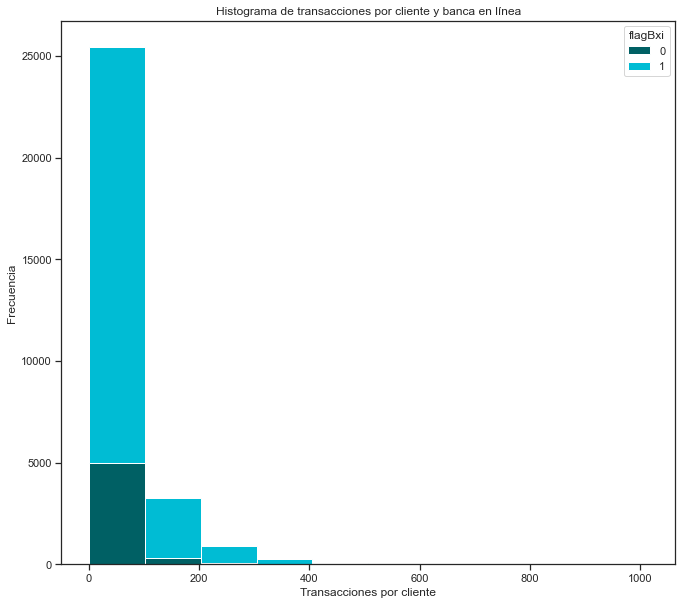

In [72]:
prop_cliente_lin.pivot(columns='flagBxi').transacciones.plot(kind = 'hist', stacked=True, color=["#006064", "#00BCD4"])
plt.ylabel('Frecuencia')
plt.xlabel('Transacciones por cliente')
plt.title('Histograma de transacciones por cliente y banca en línea')

### Construcción de matriz

In [51]:
select_data = df_completo[(df_completo.flagBxi == 1) & (df_completo.flagLimaProvEstab == 1) ]
trx = select_data.groupby(['codCliente', 'ctdTrx'], as_index=False)['ctdTrx'].sum()
filter_c = trx.loc[trx.ctdTrx >= 5,:]
filter_c.sort_values(by = ['ctdTrx'], ascending = False)

,codCliente,ctdTrx
8693,6352,610
26150,18461,553
30326,21426,549
251,160,543
5945,4302,538
...,...,...
20067,14106,5
39432,28003,5
859,552,5
14938,10611,5


In [52]:
trx_est = select_data.groupby(['codEstab', 'ctdTrx'], as_index=False)['ctdTrx'].sum().sort_values(by = ['ctdTrx'], ascending = False)
filter_est = trx_est.loc[trx_est.ctdTrx >= 30,:]
filter_est

,codEstab,ctdTrx
13148,24539,11470
13163,24544,11057
2361,2155,8901
1051,830,4875
27117,43009,4356
...,...,...
10374,20340,30
51,50,30
23134,37061,30
23157,37083,30


In [53]:
c15 = filter_c['codCliente']
e30 = filter_est['codEstab']
clientes = select_data[select_data['codCliente'].isin(c15) & select_data['codEstab'].isin(e30)][["codCliente", "codEstab", "ratingMonto"]]
clientes

,codCliente,codEstab,ratingMonto
3,5190,59776,0.001167
8,11467,5561,0.011116
10,9310,2777,0.000046
11,20020,25890,0.006117
14,14410,30658,0.001422
...,...,...,...
1591607,5429,1176,0.000409
1591610,4680,47274,0.000722
1591612,7404,30314,0.000901
1591614,16096,4323,0.005984


In [57]:
pivot_data = clientes.pivot_table(index = "codCliente", columns = "codEstab", values = "ratingMonto",
                                    aggfunc=[np.mean], fill_value = 0)
pivot_data
#save_df(pivot_data, "pivot_data.pkl")

mean                                                          \
codEstab   15    16    27        36    37    38        39    41    48      
codCliente                                                                 
1            0.0   0.0   0.0  0.000000   0.0   0.0  0.054845   0.0   0.0   
5            0.0   0.0   0.0  0.006501   0.0   0.0  0.000000   0.0   0.0   
6            0.0   0.0   0.0  0.000000   0.0   0.0  0.000000   0.0   0.0   
8            0.0   0.0   0.0  0.000000   0.0   0.0  0.000000   0.0   0.0   
9            0.0   0.0   0.0  0.000000   0.0   0.0  0.000000   0.0   0.0   
...          ...   ...   ...       ...   ...   ...       ...   ...   ...   
29996        0.0   0.0   0.0  0.000000   0.0   0.0  0.000000   0.0   0.0   
29997        0.0   0.0   0.0  0.000000   0.0   0.0  0.000000   0.0   0.0   
29998        0.0   0.0   0.0  0.000000   0.0   0.0  0.000000   0.0   0.0   
29999        0.0   0.0   0.0  0.000000   0.0   0.0  0.000000   0.0   0.0   
30000        0.0   0.0   0.0  0.000000   0.0   0.0  0.000000   0.0   0.0   

                  ...                                                        \
codEstab   50     ... 81916 81933 82014 82035 82061 82068 82096 82097 82146   
codCliente        ...                                                         
1            0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
5            0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
6            0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
8            0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
9            0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...          ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
29996        0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
29997        0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
29998        0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
29999        0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
30000        0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                  
codEstab   82268  
codCliente        
1            0.0  
5            0.0  
6            0.0  
8            0.0  
9            0.0  
...          ...  
29996        0.0  
29997        0.0  
29998        0.0  
29999        0.0  
30000        0.0  

[20747 rows x 6259 columns]